In [71]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import os

import villas.dataprocessing.readtools as rt
import villas.dataprocessing.timeseries as ts
import villas.dataprocessing.plottools as pt
import villas.dataprocessing.validationtools as vt

### Read reference simulation results

In [72]:
# Set path to file
#path = '../benchmarks/realtime/mqtt/'
#path = '../logs/BackupComparison/30M-10M/'
path = '../benchmarks/error_big/'
fileName1 = 'MQTT_NRT'
resultFile = path + fileName1 + '.csv'

# Returns list of timeseries-objects
ts_dpsim1 = rt.read_timeseries_dpsim(resultFile)

column number: 15
results length: 30
real column names: []
complex column names: ['ECS.i', 'ECS.v', 'LOAD5.i', 'LOAD5.v', 'LOAD6.i', 'LOAD6.v', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9']


### Read second simulation results

In [73]:
# Set path to file
#path = '../logs/WSCC-9bus_cosim_extension/'
fileName2 = 'MQTT_DPsimOnly'
resultFile = path + fileName2 + '.csv'

# Returns lsit of timeseries-objects
ts_dpsim2 = rt.read_timeseries_dpsim(resultFile)

column number: 15
results length: 30
real column names: []
complex column names: ['ECS.i', 'ECS.v', 'LOAD5.i', 'LOAD5.v', 'LOAD6.i', 'LOAD6.v', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9']


### Compare the wished timeseries created by the simulations and calculate the error

In [74]:
key_value = 'ECS.i'

ts1, ts2 = ts_dpsim1[key_value], ts_dpsim2[key_value]

####### Temporary test/workaround as I am not sure, why currents are negative?!
####### Is this, because inflow currents are positive and we compare the
####### inflow in DPsim's load with the outgoing current of DistAIX's cable??
#for count, value in enumerate(ts2.values.real):
#    ts2.values.real[count] = -value 
#for count, value in enumerate(ts2.values.imag):
#    ts2.values.imag[count] = -value


difference = ts.TimeSeries.diff('diff',ts1,ts2)
rmse = ts1.rmse(ts1,ts2)
rmse_norm = ts1.norm_rmse(ts1, ts2)



print(fileName1 + ' vs. ' + fileName2)
print('')
print('####################################')
print('RMSE: ' + str(rmse) + ' | ' + str(np.abs(rmse)))
print('RMSE_norm: ' + str(rmse_norm) + ' | ' + str(np.abs(rmse_norm[:1])))
print('####################################')
print('')
print('')

print('###########################')
print('Real values:')
print('Result 1: ' + str(ts1.values.real))
print('Result 2: ' + str(ts2.values.real))
print('Difference: ' + str(difference.values.real))
print('###########################')
print('')
print('')

print('###########################')
print('Imag values:')
print('Result 1: ' + str(ts1.values.imag))
print('Result 2: ' + str(ts2.values.imag))
print('Difference: ' + str(difference.values.imag))
print('###########################')
print('')
print('')
#plt.plot(diff.values.real)

MQTT_NRT vs. MQTT_DPsimOnly

####################################
RMSE: (26.5848536671534-11.978647351143199j) | 29.158916935767856
RMSE_norm: ((-0.18177139069798234-3.86133043633542e-05j), True) | [0.18177139]
####################################


###########################
Real values:
Result 1: [-133.86084  -131.274734 -135.010788 -131.692413 -134.736298 -131.941574
 -134.499344 -132.151047 -134.30632  -132.320175 -134.147919 -132.464294
 -134.010544 -172.017715 -179.316223 -176.998688 -178.762085 -174.40686
 -181.913162 -173.725739 -179.845428 -176.536163 -126.537689 -137.621124
 -129.102798 -136.150848 -130.74585  -135.124268 -131.900482 -134.08844 ]
Result 2: [   0.       -133.86084  -133.86528  -131.266418 -134.880325 -131.78476
 -134.560699 -132.170502 -134.215836 -132.45784  -133.969574 -132.661331
 -133.792877 -132.813553 -173.863342 -178.967514 -177.139511 -178.277481
 -174.630463 -181.714249 -174.146622 -178.950363 -177.786392 -125.812698
 -137.288177 -129.345169 -135.672

#### Time series plots


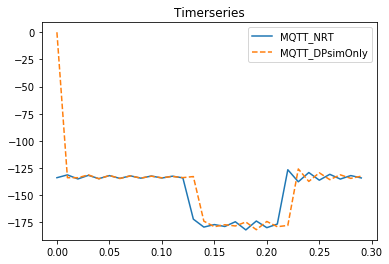

In [81]:
plt.plot(ts1.time, ts1.values)
plt.plot(ts2.time, ts2.values, linestyle = "--")
plt.title("Timerseries")
plt.legend([fileName1, fileName2])